TASK-1

       Study Hours  Attendance       Pass
count    10.000000   10.000000  10.000000
mean      6.600000   69.500000   0.600000
std       3.204164   18.922356   0.516398
min       2.000000   40.000000   0.000000
25%       4.250000   56.250000   0.000000
50%       6.500000   72.500000   1.000000
75%       8.750000   83.750000   1.000000
max      12.000000   95.000000   1.000000


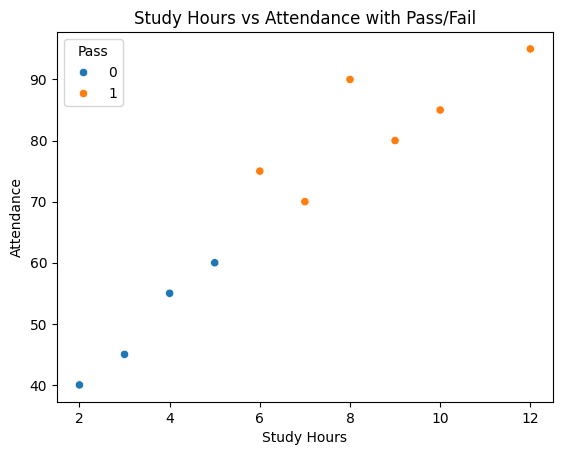

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Sample dataset
data = pd.DataFrame({
    'Study Hours': [5, 10, 2, 7, 3, 8, 6, 12, 4, 9],
    'Attendance': [60, 85, 40, 70, 45, 90, 75, 95, 55, 80],
    'Pass':        [0, 1, 0, 1, 0, 1, 1, 1, 0, 1]
})

# Data Exploration
print(data.describe())
sns.scatterplot(data=data, x='Study Hours', y='Attendance', hue='Pass')
plt.title("Study Hours vs Attendance with Pass/Fail")
plt.show()

# Features and Target
X = data[['Study Hours', 'Attendance']]
y = data['Pass']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)


TASK-2

In [2]:
# Import libraries
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download required resources
nltk.download('stopwords')
nltk.download('wordnet')

# Sample dataset
data = pd.DataFrame({
    'Review Text': [
        'This product is great!',
        'Terrible experience, will never buy again.',
        'Loved it, very useful and reliable.',
        'Worst purchase ever.',
        'Amazing quality and fast shipping!',
        'Not worth the money.',
        'I am very satisfied.',
        'Completely disappointed.',
        'Fantastic service!',
        'It broke after a week.'
    ],
    'Sentiment': ['positive', 'negative', 'positive', 'negative', 'positive',
                  'negative', 'positive', 'negative', 'positive', 'negative']
})

# Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

data['Cleaned Review'] = data['Review Text'].apply(preprocess)

# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Cleaned Review'])
y = data['Sentiment']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


              precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
